In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import gc
import pickle
import matplotlib.pyplot as plt
from __future__ import print_function
mpl.rcParams['figure.figsize'] = (18, 6)

#import numpy as np


In [ ]:
%%time

# get image at https://ganbreeder.app/i?k=ae23dc7e63526323dde46200  where key is index
# direct from aws https://s3.amazonaws.com/ganbreederpublic/imgs/ae23dc7e63526323dde46200.jpeg

#gb = pd.read_table('C:/foote/bitb/ganbreeder/export_images.txt',  header=0, skiprows=23, sep='\t')
gb = pd.read_table('/home/jtf/gith/ganalysis/unclean/export_images.txt',  header=0, skiprows=23, sep='\t')

In [ ]:
%%time
labels = ['id', 'key', 'parent1', 'parent2', 'creator', 'creation_type', 'liked', 'vector', 'label', 'truncation']
for i, label in enumerate(labels):
    gc.collect()
    gb.rename(columns={ gb.columns[i]: label },inplace=True)
display(gb.head(n=5))
#print gb.shape
#foo = gb.values

In [ ]:
%%time
gb.to_hdf('ganimages.hdf','gan')

In [ ]:
%%time
gb.to_pickle('ganimages.pkl')

In [ ]:
%%time
gp = pd.read_pickle('unclean/ganimages.pkl')

In [ ]:

display(gp.head(n=5))

In [ ]:
# save some memory
try: 
    del gp
    del gb
    del vectors2
except NameError:
    pass
gc.collect()

# Convert and save classes and vectors

In [ ]:
%%time

print gb.index
    
#l= gb.loc['creator']

vectors = []
#for v in gb['label'].values[0:10]:
for v in gb['vector'].values:
    v = v.translate(None, "{}")
    try:
        vectors.append([float(f)  for f in v.split(',')])
    except ValueError:
        print "error at line: " + str(v)




In [ ]:
lv = np.array(vectors)

In [ ]:

%%time
np.save("unclean/vectors.npy",vectors)

# Convert and save labels and likes

In [ ]:
%%time


    
#l= gb.loc['creator']

keys = []
for k in gp['key'].values:
    keys.append(k)

# these are strings so ???

In [ ]:
%%time

with open('unclean/keys.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(keys, f, pickle.HIGHEST_PROTOCOL)


In [ ]:
%%time

gc.collect()
# let's get an idea of the composition of the data. Let's look at class data first, and get a histogram. 
# What classes are there in what population?


print gb.index


likes = []
for l in gb['liked'].values:
    try:
        likes.append(int(l))
    except ValueError:
        print "error at line: " + str(l)



In [ ]:
%%time
lb = np.array(likes,dtype='uint8')

In [ ]:
%%time
np.save('unclean/likes.npy',lb)

In [ ]:
with open('unclean/keys.pkl', 'wb') as f:
    pickle.dump(keys,f)


# reload data
Restart f

In [2]:
%%time

gc.collect()

vectors = np.load('unclean/vectors.npy')


CPU times: user 23 s, sys: 1.5 s, total: 24.5 s
Wall time: 24.5 s


In [3]:
%%time
gc.collect()

classes = np.load('unclean/classes.npy')


CPU times: user 2.08 s, sys: 5.51 s, total: 7.59 s
Wall time: 16.7 s


In [4]:
%%time
gc.collect()

likes = np.load('unclean/likes.npy')


CPU times: user 1.72 s, sys: 0 ns, total: 1.72 s
Wall time: 1.73 s


In [5]:
%%time 
import pickle
with open('unclean/keys.pkl', 'rb') as f:
    keys = pickle.load(f)

CPU times: user 1.57 s, sys: 60 ms, total: 1.63 s
Wall time: 1.64 s


# Data cleanup -- remove bad table entries

In [6]:
#First take a look at vector lengths
 
print(len(vectors), len(classes), len(likes), len(keys))
# first take a look at lengths, remove last element of vectors because 1 longer than labels

lengths = [len(v) for v in vectors[:-1]]
print(min(lengths))
print(max(lengths))

lengths = np.array(lengths)
print (np.count_nonzero(lengths == 140))

print(np.where(lengths==140))
#plt.plot(lengths)



937907 937906 937907 937907
128
140
1993
(array([ 27259,  27260,  27261, ..., 916468, 916469, 916470]),)


In [7]:
# extract good data (where vectors = 128)

goodi = np.where(lengths==128)


goodv = vectors[goodi]
n = len(goodv)
m = len(goodv[0])
goodv = np.concatenate(goodv).reshape((n,m))

goodc = classes[goodi]
goodk = [keys[int(i)] for i in goodi[0]]
goodl = likes[goodi]

In [8]:
# claw back some memory
try:
    del vectors
    del classes
except NameError:
    print('oops, no such var')
    
gc.collect()

4

In [32]:
print(goodc.shape)

(935749, 1000)


In [9]:
# class labels have nans, and values too large or small: get rid of those
nonans = []
for i, c in enumerate(goodc):
    inans = np.argwhere(np.isnan(c))
    #print(inans)
    if len(inans) == 0:
        if (np.max(c) <= 1.0) and (np.min(c) >= 0.0):
            nonans.append(i)

print(len(nonans))


935749


In [11]:
goodv = goodv[nonans]
goodc = goodc[nonans]
goodl = goodl[nonans]
goodk = [keys[int(i)] for i in nonans]


print(len(goodv),len(goodc))

935749 935749


In [12]:
print(np.max(goodc))
print(np.min(goodc))

1.12589990684e+17
-8.67904981483e+16


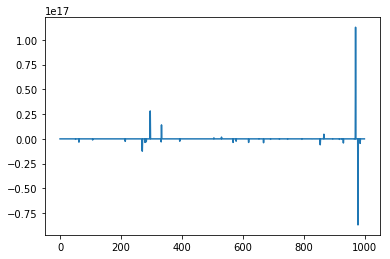

In [13]:

plt.plot(np.sum(goodc,axis=0));

In [ ]:
print(goodv.shape)
goodv = np.array(goodv)
print(goodv.shape)
n = len(goodv)
m = len(goodv[0])
v = np.concatenate(goodv).reshape((n,m))

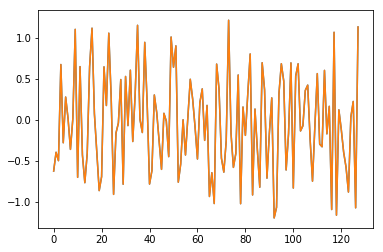

In [25]:
plt.plot(goodv[1000])
plt.show
plt.plot(v[1000,:]);
plt.show
goodv = v

In [29]:
print(np.max(goodv))
print(np.min(goodv))


1.6
-1.6


In [35]:
print(goodc.shape)

np.save('goodv.npy',goodv)

np.save('goodc.npy',goodc)

np.save('goodl.npy',goodl)



(935749, 1000)


In [27]:
%%time

# save to disk  so we don't have to recalculate



with open('goodk.pkl', 'wb') as f:
    pickle.dump(goodk, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 2.94 s, sys: 44 ms, total: 2.98 s
Wall time: 3.05 s


In [ ]:
print(np.max(goodc))

print(np.min(goodc))


# Read cleaned data
Start here if data has been saved, and/or restart kernel to save memory

In [2]:
%%time
goodv = np.load('goodv.npy')

goodc = np.load('goodc.npy')

goodl = np.load('goodl.npy')

with open('goodk.pkl', 'rb') as f:
    goodk = pickle.load(f)


CPU times: user 1.68 s, sys: 5.91 s, total: 7.58 s
Wall time: 17.6 s


In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.transpose(labels[2000:3000,:]));

In [ ]:
print np.sum(labels[0,:])
print np.sum(labels[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

In [ ]:
print np.sum(goodl[0,:])
print np.sum(goodl[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

In [ ]:
#df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
#foo = df.values[columns=df.columns[1:]]
foo = df['A'].values
print foo

print type(df)
print type(gb)

In [ ]:
#http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [ ]:
X, y = make_blobs(n_samples=200, centers=3, n_features=3, random_state=0)
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

In [ ]:
data = pd.read_csv('iris.csv', names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:
iris =  np.loadtxt('iris-num.csv', skiprows=1,delimiter=',')
print iris.shape

In [ ]:
y=iris[:,4]
plt.scatter(iris[:,0], iris[:,1], c=y)

In [ ]:
#https://www.kdnuggets.com/2018/08/introduction-t-sne-python.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


In [ ]:
irises = pd.read_csv('iris.csv', skiprows=1, names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:

pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(gb.head(n=5))

In [ ]:
gb.read_hdf('ganimages.hdf')

In [ ]:
#decimate data so we don't run out of memory:

dfsmall = gb.iloc[[0::1000], [1, 7, 8]]

display(gbsmall.head(n=5))

In [ ]:
foo = gb.values
print foo.shape

In [ ]:
pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(irises.head(n=5))


In [ ]:
display(pd.crosstab(index=irises['species'], columns='count'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
feat_cols =
pca_result = pca.fit_transform(df[feat_cols].values)